Graphically supported hypotheses in python training by João Pedro Apolonio
- Descriptive vs. associative plots
- Correlation and causation
- Induced associations like Common Cause, Indirect Cause and Common Consequence.
- Simpsons Paradox
Based on exercises by Julien Gagneur

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
dt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Data science TUM/Data/extdata/coffee_sim.csv')
dt.head()

,datavizitis_risk,packs_cigarettes_per_day,coffee_cups_per_day
0,3.514369,0,1-5
1,6.338370,0,1-5
2,2.173321,0,1-5
3,4.152559,0,5+
4,6.091390,0,1-5


In [19]:
dt.describe(include='all')

,datavizitis_risk,packs_cigarettes_per_day,coffee_cups_per_day
count,200.000000,200,200
unique,NaN,3,3
top,NaN,0,1-5
freq,NaN,100,105
mean,8.182340,NaN,NaN
std,4.324582,NaN,NaN
min,1.942685,NaN,NaN
25%,4.700330,NaN,NaN
50%,7.257729,NaN,NaN
75%,10.217880,NaN,NaN


1. Suggest an appropriate visualization and implement it to display a possible association
between coffee consumption and “datavizitis” disease risk, measured in deaths per 1000 individuals. Does
this plot by itself seem consistent with a causal effect of coffee on datavizitis?

Since the amount of coffee cups per day is discretized, we should use barplots. Observing the tendencies, we see that there is a relation between the two variables.

Text(0.5, 1.0, 'There is a relation between the two variables')

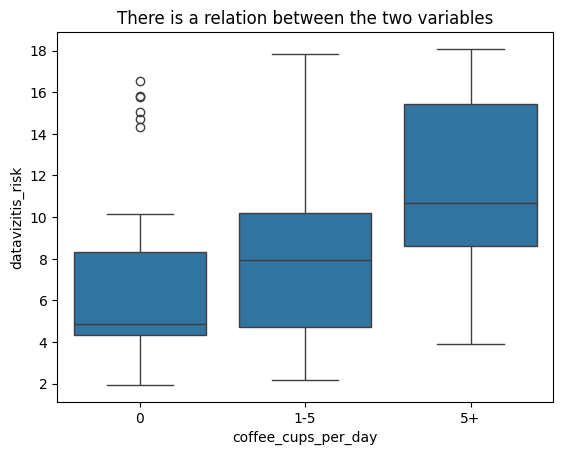

In [20]:
sns.boxplot(dt.sort_values(by='coffee_cups_per_day'),x='coffee_cups_per_day',y='datavizitis_risk')
plt.title('There is a relation between the two variables')

2. Investigate the full dataset. Do you see evidence for a third variable influencing association? Support your
statement with an appropriate plot. Draw a graph with the potential causal relationships you find consistent
with the data.

It is possible that smoking more cigaretts lead people to both drink more coffee and have datavizitis. Indeed, it looks like a common cause situation.

Text(0.5, 1.0, 'Smoking is clearly behind the relation')

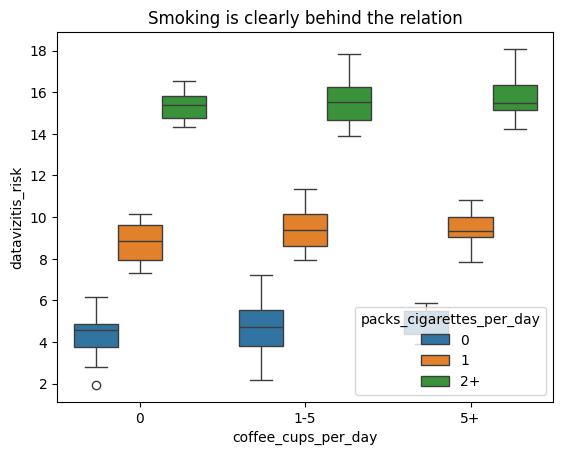

In [21]:
sns.boxplot(dt.sort_values(by='coffee_cups_per_day'),x='coffee_cups_per_day',y='datavizitis_risk',hue='packs_cigarettes_per_day')
plt.title('Smoking is clearly behind the relation')

Consider the following dataset which contains the fatality rate (percentage of deaths among infected) by
COVID 19 of different age groups in Belgium in June 2020.

The overall rate (all_ages) suggests that being a female
increases the risk of dying from COVID-19 upon infection. Using appropriate plots discuss the validity of
this hypothesis and draw a graph with the potential causal relationships you find consistent with the data.

In [22]:
fatality_dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science TUM/Data/extdata/belgium_infection_fatality_rate_june2020.csv')
fatality_dt.head()

,age_group,men,women
0,0–24,0.00,0.00
1,25–44,0.02,0.01
2,45–64,0.29,0.14
3,65–74,2.92,1.61
4,75–84,5.56,3.35


Text(0.5, 1.0, 'Men have greater Death Rates in each Age Group, but not overall')

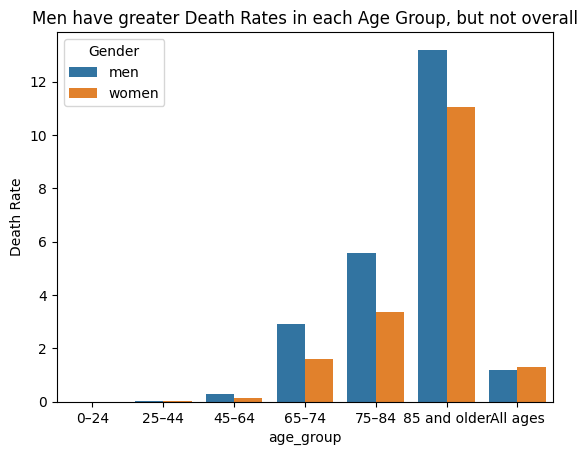

In [23]:
m_fatality_dt=pd.melt(fatality_dt,id_vars='age_group',var_name='Gender',value_name='Death Rate')
sns.barplot(m_fatality_dt,x='age_group',y='Death Rate',hue='Gender')
plt.title('Men have greater Death Rates in each Age Group, but not overall')

My explanation is that this is a case of Simpsons paradox, where the data as a whole shows something different than when separated. The reason behind this may be that there are more old women than old men, thus the death rate has more to do with age than sex and there is a common cause association.  

Consider the following dataset contains a population of 2000 individuals who got datavizitis. It consists of
the number of cigaretes each individual smokes per day, the severity of their datavizitis and if they were
hospitalized or not.

1. Visualize the relationship between the number of cigarettes smoked per day and datavizitis severity among
hospitalized individuals.


In [24]:
datavizitis_smoking_dt = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Data science TUM/Data/extdata/datavizitis_smoking.csv')
datavizitis_smoking_dt.head()

,cigarettes_per_day,datavizitis_severity,hospitalized
0,4,0.0,No
1,2,0.0,No
2,2,0.0,No
3,4,0.0,No
4,0,0.0,No


Text(0.5, 1.0, 'Datavizitis seems to decrese with cigarette use among hospitalized people')

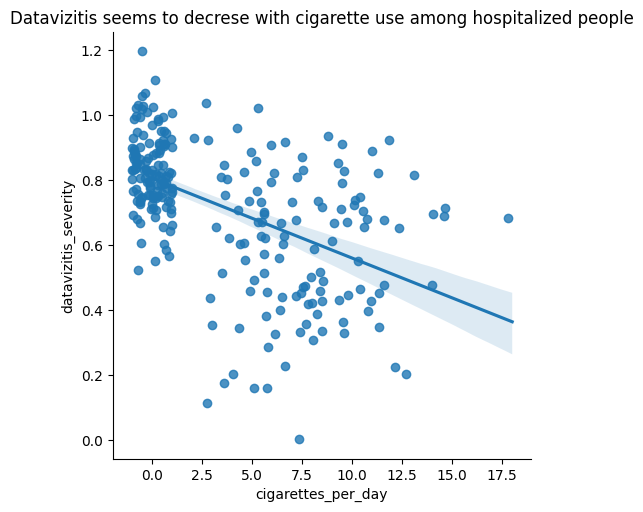

In [25]:
sns.lmplot(datavizitis_smoking_dt[datavizitis_smoking_dt.hospitalized=='Yes'], x='cigarettes_per_day', y='datavizitis_severity',x_jitter=True)
plt.title('Datavizitis seems to decrese with cigarette use among hospitalized people')

2. Visualize the relationship between datavizitis severity and cigarettes smoked per day among all population.


Text(0.5, 1.0, 'Datavizitis seems to increase with cigarette use among overall population')

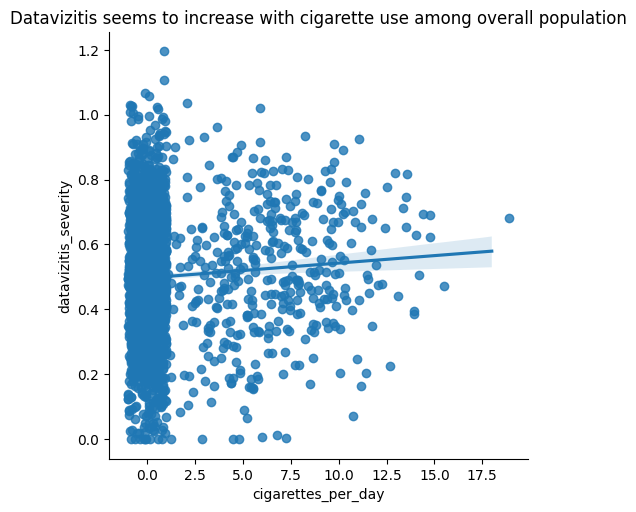

In [26]:
sns.lmplot(datavizitis_smoking_dt, x='cigarettes_per_day', y='datavizitis_severity',x_jitter=True)
plt.title('Datavizitis seems to increase with cigarette use among overall population')

3. Visualize the same relationship distinguishing between hospitalized and all individuals.


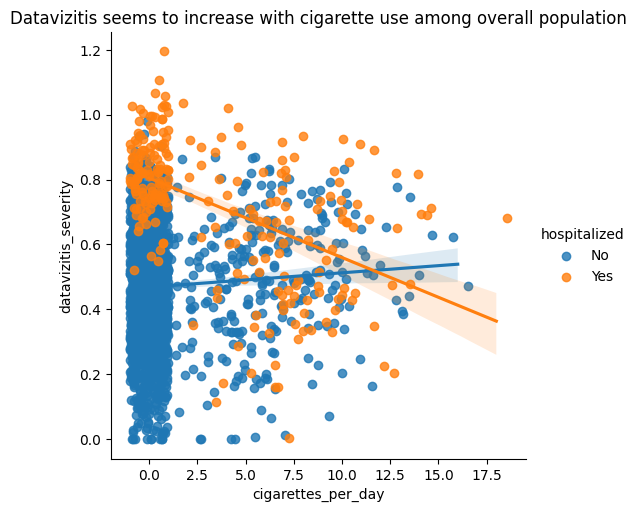

In [27]:
sns.lmplot(datavizitis_smoking_dt, x='cigarettes_per_day', y='datavizitis_severity',hue='hospitalized',x_jitter=True)
plt.title('Datavizitis seems to increase with cigarette use among overall population')
plt.show()

4. Recent studies have looked at hospitalized patients who tested positive for Covid19 and their smoking
status. They propose smoking may provide a lower risk of developing severe Covid19 based on a negative
association between Covid19 severity and smoking status. Considering the previous results on datavizitis can
you come up with a different explanation?

I believe that this is a case of Berksons paradox. It says that when we condition two variables on a third it is possible that a negative correlation appears, which does not happen with the overall population.  

Inspect the titanic data table and make a summary of the variables in the dataset. What is the overall passenger
survival rate?

The mean survival rate is the mean of the column "survived": 0.382.

In [28]:
titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data science TUM/Data/extdata/titanic.csv")
titanic.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


Does age associate with survival? Make a plot showing the distribution of age per survival outcome.


Text(0.5, 1.0, 'Age does not seem to influence survival a lot')

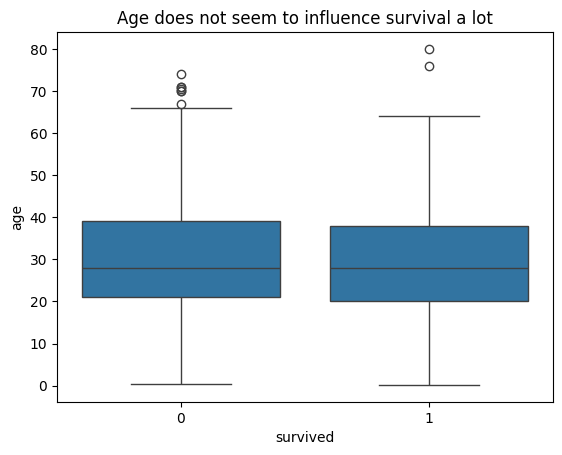

In [29]:
sns.boxplot(titanic,x='survived', y='age')
plt.title('Age does not seem to influence survival a lot')

Visualize the relationship between passenger class and survival rate.


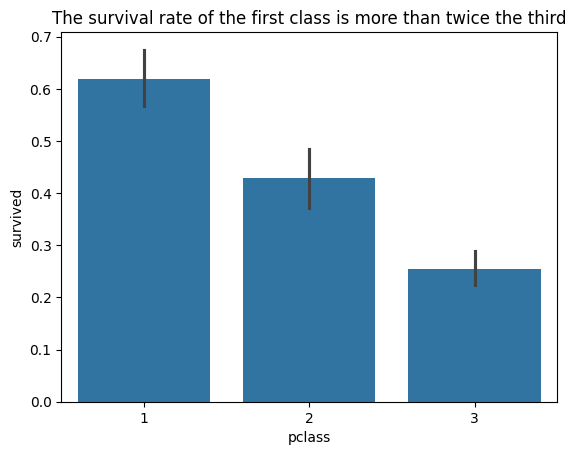

In [30]:
sns.barplot(titanic,x='pclass',y='survived')
plt.title('The survival rate of the first class is more than twice the third')
plt.show()

How is age distributed in each passenger class?

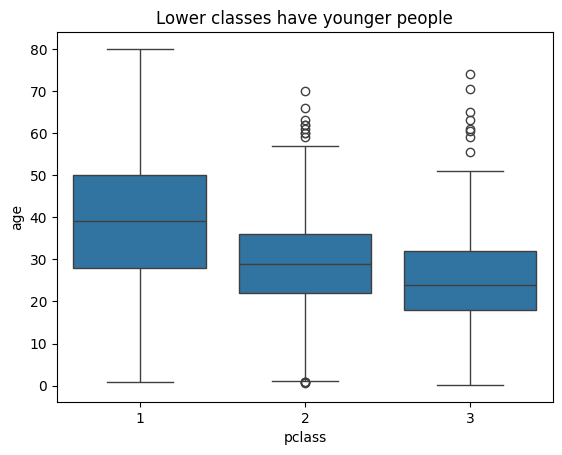

In [31]:
sns.boxplot(titanic,x='pclass',y='age')
plt.title('Lower classes have younger people')
plt.show()